# Weekly Session 6

## Goals/Topics: 

1.  Applying Gaussian Quadrature  
2.  Multidimensional Integrals      
    
2.  Use built-in integration techniques from the Numpy/Scipy libraries.

3.  Practice mechanics of python including
    a.  Strings - a simple version of a list with its own methods
    b.  Nested Lists - the foundation for working effectively with arrays or matrices.
    
4.  Practice recursion

5.  Lab this week: 
    * More integration
    * Noisy derivatives  
    * Errors in integration and derivatives

### Readings

Finish Ch 5 - *we may circle back to the topics we have skipped in this section* 
    * Newman - 5.5 (review) 
    * Newman - 5.6 - Gaussian Quadrature
    * Newman - 5.9 - integrals over multiple dimensions
    * Newman - 5.10.2 - Errors in derivatives *(review - Newman's clearest writing on error)*
    * Newman - 5.10.7 - derivatives of noisy data
    
    
Ch 15 of How to Think Like a Computer Scientist - Runestone Academy 
    https://runestone.academy/runestone/static/PHY325/IntroRecursion/toctree.html
    * section 15.4 - don't get bogged down with Hexadecimal, or other numeric representations we haven't talked about.  Run base 2 and 10 on the example: 
    ```python
        print(toStr(1453,2))
        print(toStr(1453,10))
    ```
We haven't discussed binary representations of numbers, so don't worry about understanding binary - which is a representation of a number in base 2 - this is here for the CS geeks.
    
Also don't get bogged down in the embedded exercises.  This is tricky stuff we will do together in class.

In [1]:
#For colored cells, currently black cells, white text is added in Markdown
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Exercise 0: the lambda function
Quickly read up on the ```lambda``` function [here](https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/).  You don't need to memorize anything.  We are doing this exercise because you will see ```lambda``` functions out in wild, and you might as well practice them here.

Try the example below:

In [2]:
#source:
#http://www.blog.pythonlibrary.org/2010/07/19/the-python-lambda/
import math
 
#----------------------------------------------------------------------
def sqroot(x):
    """
    Finds the square root of the number passed in
    """
    return math.sqrt(x)
 
square_rt = lambda x: math.sqrt(x)


<div class=answer>
Using your new found knowledge, explain the example above.  When/where might the lambda function be useful?

**When you are only using the function once, and it can be used in place of a normal function object**
<div/>

## Exercise 1: Gaussian Quadrature.  

Numerical integration is referred to as numerical quadrature because of the procedure of counting boxes (i.e. the trapezoid rule) that involves adding up *quadralaterals*. Newman and other computational physics textbook authors all treating Gaussian quadrature essentially like a black box.  Here is the main idea of the method, as paraphrased from Landau's book **A Survey of Computational Physics**.  

The basic integration function, $f(x)$ is redefined in terms of a weighting function $W(x)$.  The following line is exact:

$$
Int = \int_a^b f(x) dx = \int_a^b W(x) g(x) dx
$$

What might that gain us?  Take a numerical approximation: 

$$
\int_a^b W(x) g(x)~ dx \approx \sum_{i=1}^N w_i g(x_i)
$$

Think of calculating the N weights ($w_i$) and integration points ($x_i$) before performing the integral with a particular goal (or constraint). For instance, in Gaussian quadrature the defined constraint is if $f(x)$ is a $(2N-1)$ polynomial, we make the approximation error vanish.  This can only happen for a particular set of weights ($w_i$) and points ($x_i$).

For instance, an exact case might involve: $f(x)=x(x+1)$, so $W(x)=x$ and $g(x)=x+1$.  Since $f(x)$ is a second order polynomial, than $2N-1=2 \rightarrow N=3/2$.  So we propose round up to N=2.  What is with the rounding?

Thus Newman states the rule differently: *Gaussian integration on N points gives exact answers for the integrals of polynomial functions up to and including polynomials of degree 2N-1, which means degree 5 when N=3.*  

*Let's test this using Newman's black box he provides in the supplementary material.  Why do I call it a blackbox?  He puts the Legendre Polynomials in an appendix in the back of the book, posts the following code online, and doesn't explain how it works, but calls it in his text examples. *

**Note the exceptional docstring that follows most of the conventions - it even has usage examples of how to call the function.**

In [3]:
######################################################################
# Mark Newman
# http://www-personal.umich.edu/~mejn/cp/programs/gaussxw.py
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
# Excerpt from Newman:
# the calculation of the sample points and weights takes
# quite a lot of work—the functions above may take a second or so to complete
# the calculation. That’s fine if you call them only once in your program, but
# you should avoid calling them many times or you may find your program
# runs slowly. Thus, for instance, if you need to do many integrals over different
# domains of integration, you should call the function gaussxw once to calculate
# the sample points over the standard interval from −1 to +1 and then map the
# points yourself to the other integration domains you need. Calling gaussxwab
# separately for each different integration domain would be slow and wasteful,
# since it would needlessly recalculate the zeros of the Legendre polynomial
# each time.
######################################################################

import numpy as np 

def gaussxw(N,a=None,b=None,verbose=False):
    '''calculate integration points and weights for Gaussian quadrature

    ARGUMENTS:
    N - order of the Gaussian approximation 
    a - lower limit of integral, default a=None (limit = -1)
    b - upper limit of integral, default b=None (limit =  1)
    
    RETURNS
    x,w = integration points x and integration weights w such that 
          sum_i w[i]*f(x[i]) is the Nth-order
          Gaussian approximation to the integral int_{-a}^b f(x) dx
          
    USAGE EXAMPLES:
    def f1(x):
        return x*(x-1)

    N=2
    a=0
    b=1

    #return the correct weights with a single call
    xp,wp = gaussxw(N,a=a,b=b)
    
    #return the weights that may be scaled for different limits (a,b)
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    
    '''
    
    if verbose==True:
        print("The limits of the function are: ",a,b)
        
    # Initial approximation to roots of the Legendre polynomial
    a1 = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a1+1/(8*N*N*np.tan(a1)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    if a==None and b==None:
        #generally if you are recalculating the same integral use this method
        return x,w
    else:
        #if you are only doing a single integral, use this method.
        return 0.5*(b-a)*x + 0.5*(b+a), 0.5*(b-a)*w

Here is my example, using two rectangles (N=2) to solve a case where $f(x)$ is second order.  Check that this matches the analytic result.

In [4]:
def f1(x):
    return x*(x-1)

N=2
a=0
b=1

xp,wp = gaussxw(N,a=a,b=b)
    
# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f1(xp[k])

print("The integral is:",s)

The integral is: -0.166666666667


### Do Example 5.2 in Newman using Gaussian quadrature.  
You can either directly feed it a,b as in the example above, or do as Newman, and rescale the data as in the example - ```x,w=gaussxw(N)``` et *cetera*.  I recommend this since it is good practice.

In [5]:
#your code here.
from gaussxw import gaussxw

def f(x):
    return x**4 - 2*x + 1

N = 3
a = 0
b = 2

x, w = gaussxw (N)
xp = 0.5 * (b - a) * x + 0.5 * (b + a)
wp = 0.5 * (b - a) * w

s = 0
for k in range (N):
    s += wp[k] * f (xp[k])

print (s)

4.4


<div class=answer>
#### How many steps did you need to run Gaussian quadrature on this polynomial.  Does it match the constraint?  Explain?

It took 3 steps. This matches the constraint because f(x) is a fourth degree polynomial but with N = 3 we can do up to a fifth degree polynomial.
<div/>

### Do Newman 5.9 - Debye's model for heat conduction
There is some mind-blowing physics - and a great story behind the plot you are creating.  We will talk about this as a class.  

In [6]:
import gaussxw
from scipy import integrate
import math

def integrand (x):
    return x**4 * math.exp (x) / (math.exp (x) - 1)**2

x, w = gaussxw.gaussxw (N)

def cv (T, x, w):

    density = 6.022 * 10**28 
    debyeTemp = 428
    boltzmannn = 1.38064852 * 10**-23
    volume = 0.001
    
    xp = 0.5 * ((debyeTemp / T) - 0) * x + 0.5 * ((debyeTemp / T) + 0)
    wp = 0.5 * ((debyeTemp / T) - 0) * w
    
    integral = 0
    
    for i in range (N):
        integral += wp[i] * integrand (xp[i])
    
    return 9 * volume * density * boltzmannn * (T / debyeTemp)**3 * integral

In [7]:
def cvQuad (T):
    
    density = 6.022 * 10**28 
    debyeTemp = 428
    boltzmannn = 1.38064852 * 10**-23
    N = 50
    volume = 0.001
    
    integral, err = integrate.quad(integrand, 0, debyeTemp / T)
    
    return 9 * volume * density * boltzmannn * (T / debyeTemp)**3 * integral

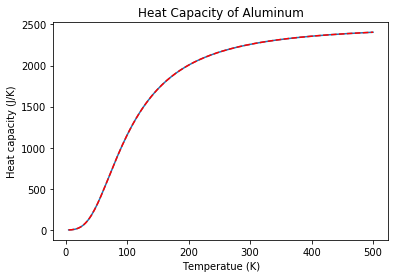

In [8]:
import pylab as plt
import numpy as np
%matplotlib inline

xValues = np.linspace (5, 500, 200)
yValues = []
N = 50

x, w = gaussxw.gaussxw (N)

for j in xValues:
    yValues.append (cv (j, x, w))
    
yValuesQuad = []

for i in xValues:
    yValuesQuad.append (cvQuad (i))

plt.plot (xValues, yValues)
plt.plot (xValues, yValuesQuad, "r--")
plt.xlabel ("Temperatue (K)")
plt.ylabel ("Heat capacity (J/K)")
plt.title ("Heat Capacity of Aluminum")
plt.show ()


<div class=answer>
#### How many steps did Newman assign you to run Gaussian quadrature on the Debye integral.  Does it match the constraint?  Explain?

He assigned N = 50. Technically this doesn't match the constraint, but $e^x$'s Taylor series expansion has coefficent! values that trail off to zero with the number of terms. Since we have accuracy to 99 order polynomials this is a fair approximation.
<div/>

**From here on out, consider Gaussian quadrature a reasonable tool to apply to smooth integrals.  But first one more question**

<div class=answer>
#### Did the calculation of ```x,w``` depend on the function or just the interval and number of steps?  Explain.

It only depends on the number of steps. We know this because the only arguement that is passed into the gausxw function is N.
<div/>

## Exercise 2: Preprogrammed Integration functions

The scipy library is a great tool for integrating functions.  Refer to the complete documentation [here](https://docs.scipy.org/doc/scipy/reference/integrate.html) as needed.

Let's use the ```quad()``` function first.  Read through its manual [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad):

<div class=answer>
#### What is the ```quad()``` function - you might have guessed it is Gaussian quadrature, but be more specific after looking through the docs:

It takes a function and a range and returns the integral value by gaussian quadrature.
<div/>

The first usage example is below.  You've just encountered several new ideas, including the ```lambda``` function.  I still consider ```lambda``` iterators black magic, but I occasionally use them myself.  Run it and play around with it using option arguments and different functions:

In [9]:
from scipy import integrate
x2 = lambda x: x**2
print(integrate.quad(x2, 0, 4)) #numerical result
print(4**3 / 3.)                # analytical result

(21.333333333333336, 2.368475785867001e-13)
21.333333333333332


<div class=answer>
#### What does the ```integrate.quad``` function return?  Use the docs to answer this question.

It returns the value of the integral over the given domain, and an estimate of the error.
<div/>

Run through the next example (in the same link) to calculate $\int_0^{\infty} e^{-x}~dx$ .

In [10]:
invexp = lambda x: np.exp(-x)
print(integrate.quad(invexp, 0, np.inf))
print(1)

(1.0000000000000002, 5.842606996763696e-11)
1


The next example is very subtle.  What are they doing here?  Add some documentation and additional print statements once you figure it out.

In [11]:
f = lambda x,a : a*x
y, err = integrate.quad(f, 0, 1, args=(1,)) # Sets the arguement a equal to 1 and integrates
print(y,err)
print (integrate.quad(lambda x : 1*x, 0, 1)) # Compares value with known value
y, err = integrate.quad(f, 0, 1, args=(3,)) # Sets the arguement a equal to 3 and integrates
print(y,err)
print (integrate.quad(lambda x : 3*x, 0, 1)) # Compares value with known value

0.5 5.551115123125783e-15
(0.5, 5.551115123125783e-15)
1.5 1.6653345369377348e-14
(1.5, 1.6653345369377348e-14)


#### Go back to Exercise 5.9 and integrate it using ```quad()``` and plot the new result vs. your own calculation.  The two curves should lie on top of one another, so use a dashed line style to confirm their simularities.

## Exercise 3: Multidimensional Integrals

Newman's introduction to multidimensional integrals is brief - he wants you to know they are possible, but he doesn't belabor them.  Lets do Exercise 5.14 together... the derivation in part (a) takes practice - write down what you can remember from Workshop.  We will work through it together.

I've gotten you started on the code below.  I've left two key lines out of the code, marked TODO, that you will need to fill in

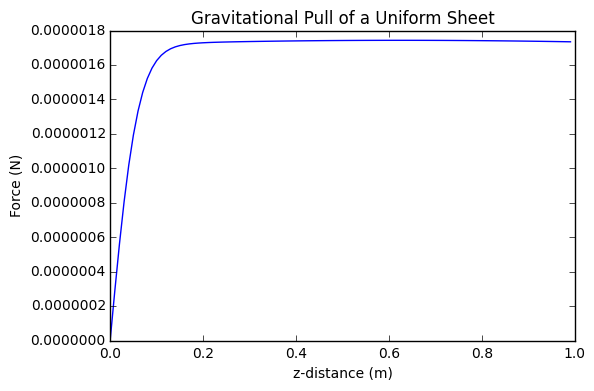

In [1]:
#Exercise 5.14 Newman
#Gravitational Pull of a Uniform Sheet

#The mass element is: 
#dm = rho*dx*dy 

#the gravitational force due to element dm is (where m1=1kg)
#dFg = G*m1 * dm / r**2
#where r is a variable that changes over the sheet.

#the z-component of the force is Fgz = Fg * cos(theta), where cos(theta)=z/r
#where z is a fixed value and r is a variable

'''
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
'''
import gaussxw
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### variable defintions:
zmin=0.0
zmax=1.0
N=100
zstep = (zmax-zmin)/N
L=10.0
G=6.674e-11
rho=100.0

#calculate the points for Gaussian integration
# be sure to calculate x,w values that work equally well for x and y (this isn't hard)

## TODO - calculate x,w 
x, w = gaussxw.gaussxwab (N, -L / 2, L / 2)

zpoints = np.arange(zmin, zmax, zstep)
fpoints = np.empty(zpoints.size)

#perform the double integral

for k in range(zpoints.size):
    
    z = zpoints[k]
    
    s=0.0 #define the integral for the fixed z value
    
    #loop through the x-y values
    for i in range(N):
        x_local = x[i]
        
        for j in range(N):
            y_local = x[j]
        
            # TODO
            s+= 1 / (x_local**2 + y_local**2 + z**2)**(3/2)
            
    s *= G * rho * z
    fpoints[k] = s

plt.plot(zpoints,fpoints)
##add plot labels/titles 
plt.xlabel ("z-distance (m)")
plt.ylabel ("Force (N)")
plt.title ("Gravitational Pull of a Uniform Sheet")
plt.show()


<div class=answer>
### Does your answer make sense?  Do you expect the gravitational force to decrease as you approach the sheet?  So what is going on here?

This is not what we expect. The force should increase as the mass approaches the sheet.  The force increases quickly as z approaches zero, because z is in the denominator of the integrand, and as the denominator approaches zero, the value will approach infinity.
<div/>

### Run through the scipy docs on multiple integrals [here](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#general-multiple-integration-dblquad-tplquad-nquad)

In [30]:
from scipy import integrate
N = 5
def f(t, x):
    return np.exp(-x*t) / t**N

integral, error = integrate.nquad(f, [[1, np.inf],[0, np.inf]])
print(integral * G*rho*z)

1.33480000013e-09


### Now see if you can use scipy to do the same integral.

In [27]:
def f(x, y):
    return 1/(x_local**2 * y_local**2 * z**2)**(3/2)

integrate.nquad(f, [[-L/2, L/2],[-L/2, L/2]])

(91903932344204.31, 1.0203386174212827)

## Exercise 4: Strings

Write a function that takes a string as an argument and displays
the letters backward, one per line.
*You will recycle this code, so make sure you make that easy to do.*

Don't forget the docstring and write a usage example.

In [3]:
def reverse(s):
    """Reveres the order of a string
    
    Arguements: s - a string
    
    Returned: s - the backwards string
    
    Example: backward becomes drawkcab"""
    
    if len(s) <= 1:
        return s
    else:
        return reverse(s[1:]) + s[0]

### String slices
Predict what the following code will print and then test it out.

```python
fruit = "banana"
print(fruit[:])
print(fruit[1:])
print(fruit[:1])
print(fruit[:-1])
print(fruit[-1:])
```
Answer this conceptually, in general, not based on the specific value "banana"

<div class=answer>
The whole string  
The whole string minus the first element  
The first element  
The whole string minus the last element  
The last element  
<div/>

Below is an example of applying the ```ord()``` function to the characters in fruit, which prints the ASCII codes for each character.  Check it out, the explanation follows.

In [34]:
fruit = "banana"

for i in fruit:
    print(ord(i))
    
print(fruit[:])
print(fruit[1:])
print(fruit[:1])
print(fruit[:-1])
print(fruit[-1:])

65
100
114
105
97
110
banana
anana
b
banan
a


### ASCII codes
Characters are represented by a computer, as integers. The correspondence between
these integers and characters is defined by the [American Standard Code for Information
Interchange (ASCII)](https://en.wikipedia.org/wiki/ASCII). 

For instance, $65 = A, 66 = B, ... , 97 = a$, etc. 

It is only when a human interface is involved (e.g., the labels on keyboard keys for input, or the shapes drawn for the "letters" on your terminal) that any real connection exists between these integers and the good old letters you learned as a child.

So, a string is really a list or array of integers. The details of how Python stores this list internally is not really our concern. But, what matters is that Python presents us with an interface for strings, i.e., a set of operations we can do on them, which is in some ways similar to that of a Python list and in some ways different. In Python-speak, lists and strings are both examples of sequences, so we can, e.g., use a for loop to loop over the entries.  First, look up an ASCII table on the web, e.g., Wikipedia. What are the ASCII codes for the letters in your first name? Use proper capitalization. Write out the list ASCII codes.

<div class=answer>
65
100
114
105
97
110
<div/>

To check yourself, write a function ascii list which takes a string and returns a list of integer character codes. You can make use the ```ord()``` function, which takes as its argument a string containing a single character and returns the integer ASCII code for this character.  (Etymologically, the names for ```ord()``` and its inverse function ```chr()``` are traditional, inherited from much older languages, such as BASIC. The origin is that ```ord()``` returns an ordinal number corresponding to the character. I guess ```chr()``` for character should be self-explanatory!)  Write a program which keeps inputting a string from the user, then printing the corresponding list of ASCII codes, until the user enters a blank line (null string).  

*You will have to remind yourself how to get user input as we did in previous weekly sessions.*

In [37]:
while not name == "":
    name = input("Enter your name: ")
    for i in name:
        print(ord(i))

Enter your name: Adrian
65
100
114
105
97
110
Enter your name: 


### String methods

There is a string method called ```count()```. Read the [documentation](https://docs.python.org/2/library/stdtypes.html#string-methods) of this method and write an invocation that counts the number of ```a```'s in "banana"

Continue to experiment with string methods to make sure you understand how they work.
The methods ```strip()``` and ```replace()``` are particularly useful.

In [46]:
print("banana".count("a"))
print("banana".replace("a", "o"))
print(" words words words ".strip())

3
bonono
words words words


Another string method we have used is to format our strings.  For instance: 
```python
"The sum of 1 + 2 is {0}".format(1+2)
```
Remember this method for printing well formatted output.

### Commentary: Methods
*This is just for your education, so don't worry if you don't completely absorb it yet...*

At this point, the method syntax must seem like just a quirky variation on the usual syntax for calling functions. (*Like, whatever, sure we can call a function that way if that's what Python wants...*). 

**But the idea of methods actually turns out to be very powerful.** It is one
aspect of object oriented programming. You have already been using the ```append()``` method for  lists, so this is not entirely new.  I can't resist giving you a foreshadoing of the difference in mindset between traditional procedural programming and object oriented programming, even if it is too early to see how  object oriented programming is useful. The syntax

```python
find(word,"a")
```

reflects the traditional procedural way of thinking about the problem. It translates into:
*Hello function find! Please take this string word and do something to it ->
search for an a in it.*

Data is just the passive recipient, while procedures do things to the data. But the syntax
```python
word.find("a")
```
reflects the object oriented way of thinking about the problem. It translates into

*Hello word! Would you kindly tell me if you contain a letter a, and where it is?*

You are interacting with the data (here, the string word) as if it were an animate object which could actually do things.
The difference in approach looks superficial at first. Indeed, it is not very important in simple problems with simple, orderly data (say, if you are solving a partial differential equation, you just have to deal with a big array of numerical values). But it is game-changing when you have to deal with lots of different types of data at the same time (say, analyzing data from an LHC experiment).

### String comparisons
The word "Pineapple" comes before "banana" in terms of sorting
order. Explain this behavior in terms of ASCII codes. (You can use your program ascii!)
Is it true that "cat">"Dog", and "5">"15"? Explain.


<div class=answer>
"Pineapple" comes before "banana" because capital letters are represented by smaller numbers. This is also why "cat">"Dog". "5">"15" because the digit "1" is represented by a smallter number than the digit "5".
<div/>

In [2]:
name = "blank"
while not name == "":
    name = input("Enter your name: ")
    for i in name:
        print(ord(i))

Enter your name: Pinneapple
80
105
110
110
101
97
112
112
108
101
Enter your name: banana
98
97
110
97
110
97
Enter your name: cat
99
97
116
Enter your name: Dog
68
111
103
Enter your name: 5
53
Enter your name: 15
49
53
Enter your name: 


KeyboardInterrupt: 

### Testing for Palindromes

Write a function that takes a string as a parameter and returns ```True``` if the string is a palindrome, ```False``` otherwise. Remember that a string is a palindrome if it is spelled the same both forward and backward. for example: radar is a palindrome. for bonus points palindromes can also be phrases, but you need to remove the spaces and punctuation before checking. for example: "madam i’m adam" is a palindrome. Other fun palindromes include:

* kayak
* aibohphobia
* Live not on evil
* Reviled did I live, said I, as evil I did deliver
* Able was I ere I saw Elba
* Kanakanak – a town in Alaska
* Wassamassaw – a town in South Dakota

(*Hint:* write a ```reverse``` function to make this easy!).

In [7]:
def removeWhite(s):
    if len(s) == 0:
        return s
    if s[0] == " " or s[0] == "'":
        s = removeWhite(s[1:])
    else:
        s = removeWhite(s[1:]) + s[0]
    return s

def isPal(s):
    if s == reverse(s):
        return True
    else: 
        return False
    
print(isPal(removeWhite("kayak")))
print(isPal(removeWhite("aibohphobia")))
print(isPal(removeWhite("Live not on evil")))
print(isPal(removeWhite("Reviled did I live, said I, as evil I did deliver")))
print(isPal(removeWhite("Able was I ere I saw Elba")))
print(isPal(removeWhite("Kanakanak – a town in Alaska")))
print(isPal(removeWhite("Wassamassaw – a town in South Dakota")))

True
True
False
False
False
False
False


**We will also do this with recursion starting on Wednesday.**

## Exercise 5: Working with nested lists
Write a function called ```nested_sum()``` that takes a nested list of
integers and add up the elements from all of the nested lists.  For example, what if you want to add the entries of: 

```python
list1 = [1,2,3] # levels = 1
list2 = [[1,2,3],[4,5,6]] # levels = 2
list3 = [[[1,2],[3,4]],[[5,6],[7,8]]] # levels = 3
```

In [20]:


def nested_sum (listVar):
    sum = []
    
    while not isinstance (listVar, int):
        for i in range(0,len(listVar)):
            sum.append(listVar[i])
            
        listVar = sum
        sum = []

        
    return listVar

var = 1
print (isinstance (var, int))
print (nested_sum ([1, 2, 3]))

True


KeyboardInterrupt: 

Next, use the ```map()``` function to try mapping a simple mathematical function (say, squaring) onto the entries of the following lists:
```python
list1 = [1,2,3] # levels = 1
list2 = [[1,2,3],[4,5,6]] # levels = 2
list3 = [[[1,2],[3,4]],[[5,6],[7,8]]] # levels = 3
```
Warm-up: First, use the built-in function ```map()``` to do this mapping on ```list1```.
Newman used ```map()``` in Ch 2, but you should probably [refresh your memory](http://book.pythontips.com/en/latest/map_filter.html).

Note that ```map()``` is defined for 1 dimensional lists, so you will have to break your multidimensional list up to do this for ```list2``` and ```list3```.

In [7]:
help (map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



### The Hilbert matrix

The $n\times n$ Hilbert matrix has its $(i,j)$th entry given by $1/(i+j-1)$.  For
instance, the $3\times 3$ Hilbert matrix is

$$
\begin{bmatrix}
1 & 1/2 & 1/3 \\
1/2 & 1/3 & 1/4 \\
1/3 & 1/4 & 1/5
\end{bmatrix}
$$

Write a function ```HilbertMatrix(n)``` which returns the $n \times n$ Hilbert matrix, represented as a nested list.


In [ ]:
#your code here

### Creating new lists *vs.* in-place modificaton of old lists

Write a function called ```middle()``` that takes a list and returns a new list that contains all but the first and last elements. So ```middle([1,2,3,4])``` should
return ```[2,3]```.

Write a function called ```chop``` that takes a list, modifies it by removing the first and last elements, and returns ```None```.


In [ ]:
#your code here

**How to Think like a Computer Scientist** gives the debugging hint related to this idea of creation of a new list (which is what the addition operator does) *vs.* in-place modification (which is what the ```append``` methods does):

*To add an element, you can use the ```append``` method or the ```+``` operator. Assuming that ```t``` is a list and ```x``` is a list element, these are right:

```python
t.append(x)
t = t + [x]
```

And these are wrong:

```python
t.append([x]) # WRONG!
t = t.append(x) # WRONG!
t + [x] # WRONG!
t = t + x # WRONG!
```

Try out each of these examples in interactive mode, and explain
what they do, and how it is not what we were setting out to do.

In [ ]:
#your answer here

# Intro to Recursion 
*Before proceeding, do the reading for Thursday's Lab.*

As stated in **How to Think Like a Computer Scientist**

All recursive algorithms must obey three important laws:

1.  A recursive algorithm must have a base case.
2.  A recursive algorithm must change its state and move toward the base case.
3.  A recursive algorithm must call itself, recursively.

Be prepared to identify these rules for every following recursive algorithm in this notebook.

## Exercise 6 - Introducing Recursion 

*Newman introduces recursion way back in Exercise 2.13.  The problem is reproduced here for us to work through:*

### Factorials
A useful feature of user-defined functions is **recursion**, the ability of a function to call itself.  For example, consider the following definition of the factorial $n!$ of a positive integer $n$:
$$
n! = \biggl\lbrace\begin{array}{ll}
  1 & \qquad\mbox{if $n=1$,} \\
  n\times(n-1)! & \qquad\mbox{if $n>1$.}
\end{array}
$$

This constitutes a complete definition of the factorial which allows us to calculate the value of $n!$ for any positive integer.  We can employ this definition directly to create a Python function for factorials, like this:
```python
def factorial(n):
    if n==1:
        return 1
    else:
        return n*factorial(n-1)
```
Note how, if $n$ is not equal to 1, the function calls itself to calculate the factorial of $n-1$.  This is recursion.  If we now say ```print(factorial(5))``` the computer will correctly print the answer $120$.

<div class=answer>
#### In the algorithm above, explain how Newman uses the 3 rules of recursion
Answer here
<div/>

### Catalan Numbers (also from Newman)
We encountered the Catalan numbers $C_n$ previously in Exercise 2.7
  on page 46.  With just a little rearrangement, the definition given there
  can be rewritten in the form
    $$
    C_n = \left\lbrace\begin{array}{ll}
       1 & \qquad\mbox{if $n=0$,} \\
      \dfrac{4n-2}{n+1}\,C_{n-1} & \qquad\mbox{if $n>0$.}
       \end{array}\right.
    $$

Write a Python function, using recursion, that calculates $C_n$.  Use your function to calculate and print $C_{100}$.

In [ ]:
#your answer here

Comparing the calculation of the Catalan numbers above with
that of Exercise 2.7, we see that it's possible to do the calculation two
ways, either directly or using recursion.  In most cases, if a quantity can
be calculated *without* recursion, then it will be faster to do so,
and we normally recommend taking this route if possible.  There are some
calculations, however, that are essentially impossible (or at least much
more difficult) without recursion.  We will see some examples later in this
book.

### Now repeat the palindrome test with a recursion algorithm.

In [ ]:
#your code here.

## Exercise 7 - Euclid's method (also from Newman)

Finding the greatest common divisor (GCD) of two numbers is a classic mathematical problem.  Euclid showed that the greatest common divisor $g(m,n)$ of two
  nonnegative integers $m$ and $n$ satisfies
    $$
    g(m,n) = \biggl\lbrace\begin{array}{ll}
      m & \qquad\mbox{if $n=0$,} \\
      g(n,m\>\textrm{mod}\>n) & \qquad\mbox{if $n>0$.}
    \end{array}
    $$
    
*Write a Python function ```g(m,n)``` that employs recursion to calculate
the greatest common divisor of $m$ and $n$ using this formula.  Use your
function to calculate and print the greatest common divisor of 108 and 192.*

#### This problem is broken down below, so you don't have to solve it all at once, unless you want to.  See the following

Python has built-in ```min()``` and ```max()``` functions. But let us try our hand at writing our own minimum and maximum functions, which we can name ```min2``` and ```max2```. (Everyone should get to write minimum and maximum functions at least once in their life, before using the canned versions!) These should take two arguments, as  ```min2(a,b)```  and  ```max2(a,b)```. Give pseudocode for how you would pick the minimum of two numbers.

In [ ]:
#your answer here

Incidentally, did it matter whether you used $<$ or $\le$ in this code? Explain.

Suggestions for incremental development: First write these functions ```min2``` and ```max2```, test them, and save the results as "usage examples" in the docstrings. 

Then write ```gcd()```, test it out for a few representative cases, and again save these as "usage examples".
Then you can move on to our bigger goal:  *Write a program which loops, inputting pairs
of integers (simply create a list of tuples) and printing their GCD.*


In [ ]:
#your code here

### Exercise 8: Back to Nested Lists

How can you use recursion to represent mapping onto an n-level list in terms of
mapping onto an (n - 1)-level list? What is the base case, at which you simply do the
mapping instead of recursing? Can you use the built-in map to carry out this base case?

Notice that a "nested list" with two levels, like ```list2``` defined above, is conceptually the same thing as a "two-dimensional array" or a "matrix" In fact, let us lay out ```list2``` so it
looks a bit more like a $2 \times 3$ matrix:
```python
list2 = [
[1,2,3],
[4,5,6]
]
```

How would you access the entry in, say, row 2 and column 3, using brackets? In general, how would you access the $(i, j)$-th entry, in matrix notation? For instance $M_{ij}$ refers to the entry in row $i$ and column $j$ of matrix $M$, counting from $M_{11}$ at the upper left corner of the matrix.

<div class=answer>
Answer here
<div/>

*FYI: However, for serious computing, storing a matrix using nested lists is not the most efficient approach, and this is not how numpy stores its arrays. We will discuss this more...*

In [ ]:
#your answer here